In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from scipy import sparse
from matplotlib import cm

In [2]:
N = 100
X, Y, Z = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float), np.linspace(0,1,N, dtype=float))
#creates 200x200 3d grid

In [3]:
#create potential, this is for a harmonic oscillator
def potential(x,y,z):
    return 0.5*((x-0.5)**2+(y-0.5)**2+(z-0.5)**2)
V = potential(X,Y,Z)

In [4]:
#Now we create hamiltionian matrix; H = T + U. T = laplacian operator, 
#i.e that 3-fold kronecker sum. U is the potential we just defined.
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
#this d is basically like our one d laplace operator, but now we need a kronsum to make it 2d
intermediate = sparse.kronsum(D,D)
T = -0.5*sparse.kronsum(intermediate,D)
#now we create a matrix for the potential and add the two components of the energy
U = sparse.diags(V.reshape(N**3), (0))
H = T + U

Text(0.5, 0.92, 'V(x,y,z)')

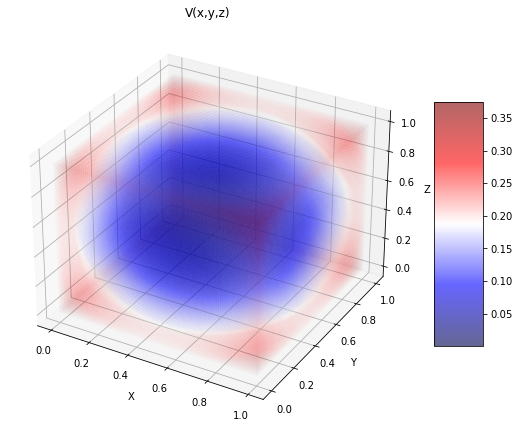

In [5]:
#potential plot
fig = plt.figure(0,figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")
plot0 = ax.scatter3D(X, Y, Z, c=V,
cmap=cm.seismic,
s=0.001,
alpha=0.6,
antialiased=True)
fig.colorbar(plot0, shrink=0.5, aspect=5)
ax.set_xlabel(r"X")
ax.set_ylabel(r"Y")
ax.set_zlabel(r"Z")
ax.set_title("V(x,y,z)")

In [6]:
#now we find + plot eigenvalues/eigenvectors
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')
def evectors(n):
    return eigenvectors.T[n].reshape((N,N,N))
def evalues(n):
    return eigenvalues[n]

Text(0.5, 0.92, 'Eigenfunction')

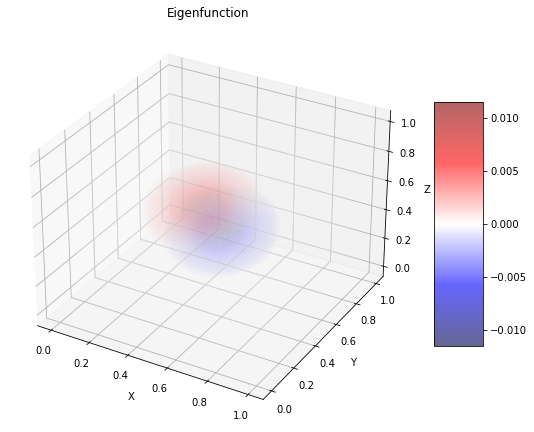

In [7]:
#plot eigenvector
fig = plt.figure(1,figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")
#ax.set_axis_off()
plot1 = ax.scatter3D(X, Y, Z, c=evectors(1), cmap=cm.seismic, s=0.001, alpha=0.6, antialiased=True)
fig.colorbar(plot1, shrink=0.5, aspect=5)
ax.set_xlabel(r"X")
ax.set_ylabel(r"Y")
ax.set_zlabel(r"Z")
ax.set_title("Eigenfunction".format(1))